In [1]:
import torch
from plyfile import PlyData, PlyElement
import mathutils
import numpy as np
from tqdm import tqdm
from pathlib import Path

In [2]:
def parse_pointcloud(scene_path: str):
    with open(scene_path, "rb") as f:
        scene_cloud = PlyData.read(f)

    xyz = np.stack((np.asarray(scene_cloud.elements[0]["x"]),
                    np.asarray(scene_cloud.elements[0]["y"]),
                    np.asarray(scene_cloud.elements[0]["z"])), axis=1)

    N = len(xyz)

    log_scales = np.stack((np.asarray(scene_cloud.elements[0]["scale_0"]),
                        np.asarray(scene_cloud.elements[0]["scale_1"]),
                        np.asarray(scene_cloud.elements[0]["scale_2"])), axis=1)

    scales = np.exp(log_scales)

    quats = np.stack((np.asarray(scene_cloud.elements[0]["rot_0"]),
                        np.asarray(scene_cloud.elements[0]["rot_1"]),
                        np.asarray(scene_cloud.elements[0]["rot_2"]),
                        np.asarray(scene_cloud.elements[0]["rot_3"])), axis=1)

    rots_euler = np.zeros((N, 3))

    for i in range(N):
        quat = mathutils.Quaternion(quats[i].tolist())
        euler = quat.to_euler()
        rots_euler[i] = (euler.x, euler.y, euler.z)
    
    opacities = scene_cloud.elements[0]["opacity"]

    veggie_inds = scene_cloud.elements[0]["veggie"]
    
    return xyz, scales, rots_euler, opacities, veggie_inds

In [3]:
scene_name = "bear_0"

In [4]:
locations, scales, rots, opacities, veggie_inds = parse_pointcloud(f"C:\\Users\\rohan\\Documents\\sp24\\cs280\\final_proj\\scenes\\{scene_name}.ply")

In [5]:
locations, scales, rots, veggie_inds, opacities = locations[opacities > 0.5], scales[opacities > 0.5], rots[opacities > 0.5], veggie_inds[opacities > 0.5], opacities[opacities > 0.5]
len(locations)

161523

In [6]:
# only keep points within a bounding box
bbox = ((-0.3, 0.3), (-1, 0), (-0.3, 0.3))
scales = scales[(locations[:, 0] > bbox[0][0]) & (locations[:, 0] < bbox[0][1]) & (locations[:, 1] > bbox[1][0]) & (locations[:, 1] < bbox[1][1]) & (locations[:, 2] > bbox[2][0]) & (locations[:, 2] < bbox[2][1])]
rots = rots[(locations[:, 0] > bbox[0][0]) & (locations[:, 0] < bbox[0][1]) & (locations[:, 1] > bbox[1][0]) & (locations[:, 1] < bbox[1][1]) & (locations[:, 2] > bbox[2][0]) & (locations[:, 2] < bbox[2][1])]
veggie_inds = veggie_inds[(locations[:, 0] > bbox[0][0]) & (locations[:, 0] < bbox[0][1]) & (locations[:, 1] > bbox[1][0]) & (locations[:, 1] < bbox[1][1]) & (locations[:, 2] > bbox[2][0]) & (locations[:, 2] < bbox[2][1])]
opacities = opacities[(locations[:, 0] > bbox[0][0]) & (locations[:, 0] < bbox[0][1]) & (locations[:, 1] > bbox[1][0]) & (locations[:, 1] < bbox[1][1]) & (locations[:, 2] > bbox[2][0]) & (locations[:, 2] < bbox[2][1])]
locations = locations[(locations[:, 0] > bbox[0][0]) & (locations[:, 0] < bbox[0][1]) & (locations[:, 1] > bbox[1][0]) & (locations[:, 1] < bbox[1][1]) & (locations[:, 2] > bbox[2][0]) & (locations[:, 2] < bbox[2][1])]


In [7]:
len(locations)

14325

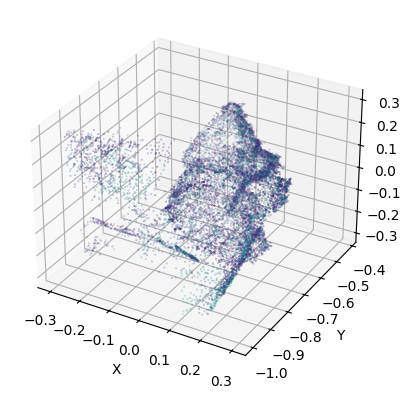

In [8]:
# visualize the point cloud
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
sparse_locations = locations[::1]
ax.scatter(sparse_locations[:, 0], sparse_locations[:, 1], sparse_locations[:, 2], c=opacities[::1], cmap='viridis', s=0.05)
plt.show()